<a href="https://colab.research.google.com/github/JonathanCristovao/visao-computacional/blob/main/0_base_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conjuntos de dados do TensorFlow


1. Download da base de dados e salvamento em um diretorio no google drive.
2. Leitura do conjunto de dados salvo.

https://www.tensorflow.org/datasets/overview?hl=pt-br



In [ ]:
# !pip install tensorflow-datasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import cv2
from google.colab import drive


# 1. Download da base de dados e salvamento em um diretorio no google drive.



### 1.1 Baixar apenas 800 imagens de cada classe

In [62]:


# Montar o Google Drive
#drive.mount('/content/drive')

def save_images(dataset_name, base_save_dir, num_images_per_class=800):
    # Carregar o dataset 'cats_vs_dogs'
    dataset, info = tfds.load(dataset_name, split='train', with_info=True, as_supervised=True)

    # Criar diretórios de salvamento, se não existirem
    dogs_dir = os.path.join(base_save_dir, 'dogs')
    cats_dir = os.path.join(base_save_dir, 'cats')
    os.makedirs(dogs_dir, exist_ok=True)
    os.makedirs(cats_dir, exist_ok=True)

    # Contadores para controlar o número de imagens salvas por classe
    cat_count = 0
    dog_count = 0

    # Iterar sobre o dataset e salvar as imagens em diretórios separados
    for i, (image, label) in enumerate(dataset):
        if cat_count >= num_images_per_class and dog_count >= num_images_per_class:
            break

        # Converter o tensor da imagem para um array numpy
        image_np = image.numpy()

        # Determinar o diretório de salvamento com base no rótulo
        if label.numpy() == 0 and cat_count < num_images_per_class:
            # 0 corresponde a gatos
            save_dir = cats_dir
            label_name = 'cat'
            cat_count += 1
        elif label.numpy() == 1 and dog_count < num_images_per_class:
            # 1 corresponde a cachorros
            save_dir = dogs_dir
            label_name = 'dog'
            dog_count += 1
        else:
            continue

        # Salvar a imagem com um nome único usando OpenCV
        image_filename = os.path.join(save_dir, f'{label_name}_{i:05d}.jpg')
        cv2.imwrite(image_filename, cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR))

        # Exibir progresso
        if (cat_count % 100 == 0 or dog_count % 100 == 0) and i % 100 == 0:
            print(f'{cat_count} imagens de gatos e {dog_count} imagens de cachorros salvas...')

    print(f'Todas as imagens foram salvas em: {base_save_dir}')

# Nome do dataset e diretório base para salvar as imagens
dataset_name = 'cats_vs_dogs'
base_save_dir = '/content/drive/My Drive/cats_vs_dogs_images_short'

# Baixar e salvar o dataset, separando por classe
#save_images(dataset_name, base_save_dir)


#### Todas as imagens

In [60]:
def save_all_imgs(dataset_name, base_save_dir):
    # Carregar o dataset 'cats_vs_dogs'
    dataset, info = tfds.load(dataset_name, split='train', with_info=True, as_supervised=True)

    # Criar diretórios de salvamento, se não existirem
    dogs_dir = os.path.join(base_save_dir, 'dogs')
    cats_dir = os.path.join(base_save_dir, 'cats')
    os.makedirs(dogs_dir, exist_ok=True)
    os.makedirs(cats_dir, exist_ok=True)

    # Iterar sobre o dataset e salvar as imagens em diretórios separados
    for i, (image, label) in enumerate(dataset):
        # Converter o tensor da imagem para um array numpy
        image_np = image.numpy()

        # Determinar o diretório de salvamento com base no rótulo
        if label.numpy() == 0:
            # 0 corresponde a gatos
            save_dir = cats_dir
            label_name = 'cat'
        else:
            # 1 corresponde a cachorros
            save_dir = dogs_dir
            label_name = 'dog'

        # Salvar a imagem com um nome único usando OpenCV
        image_filename = os.path.join(save_dir, f'{label_name}_{i:05d}.jpg')
        cv2.imwrite(image_filename, cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR))

        # Exibir progresso
        if i % 100 == 0:
            print(f'{i} imagens salvas...')

    print(f'Todas as imagens foram salvas em: {base_save_dir}')



# Nome do dataset e diretório base para salvar as imagens
dataset_name = 'cats_vs_dogs'
base_save_dir = '/content/drive/My Drive/cats_vs_dogs_images'

#save_all_imgs(dataset_name, base_save_dir)

# 2 . Leitura do conjunto de dados salvo.

### 2.1 Ler apenas uma imagem de cada classe.

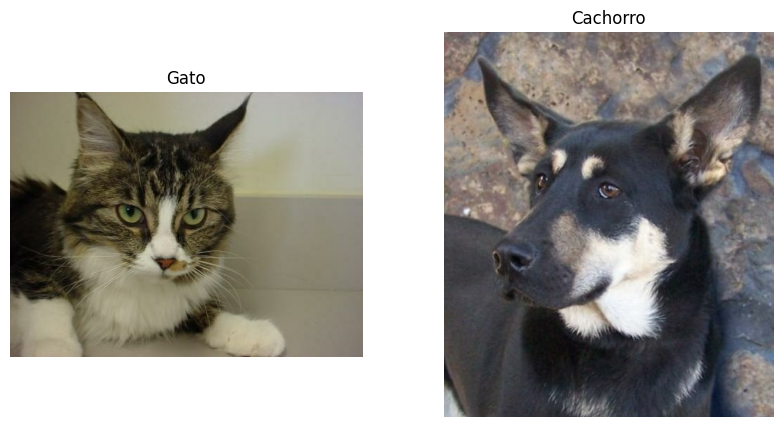

In [22]:
# Caminho para as imagens específicas
image_path_cat = '/content/drive/My Drive/cats_vs_dogs_images_short/cats/cat_01423.jpg'
image_path_dog = '/content/drive/My Drive/cats_vs_dogs_images_short/dogs/dog_01616.jpg'

# Carregar as imagens usando OpenCV
image_cat = cv2.imread(image_path_cat)
image_dog = cv2.imread(image_path_dog)

# Converter de BGR para RGB para exibir corretamente com Matplotlib
image_rgb_cat = cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB)
image_rgb_dog = cv2.cvtColor(image_dog, cv2.COLOR_BGR2RGB)

# Plotar as duas imagens lado a lado
plt.figure(figsize=(10, 5))

# Imagem do gato
plt.subplot(1, 2, 1)
plt.imshow(image_rgb_cat)
plt.title('Gato')
plt.axis('off')

# Imagem do cachorro
plt.subplot(1, 2, 2)
plt.imshow(image_rgb_dog)
plt.title('Cachorro')
plt.axis('off')

# Mostrar as imagens
plt.show()

### 2.2 Ler todas as imagens de cada classe.

In [51]:
# Função para carregar e redimensionar imagens
def load_images_from_folder(folder,img_size=(64, 64)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)  # Redimensiona para um tamanho fixo
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converte para RGB
            images.append(img)
    return images

cat_images = load_images_from_folder('/content/drive/My Drive/cats_vs_dogs_images_short/cats/')
dog_images = load_images_from_folder('/content/drive/My Drive/cats_vs_dogs_images_short/dogs/')

cat_images[0]

In [64]:
# Matriz de pixels da primeira imagem
print(cat_images[0])

[[[ 93  67   8]
  [ 95  69  10]
  [ 95  73  13]
  ...
  [113  90  36]
  [112  89  35]
  [109  86  32]]

 [[ 91  65   6]
  [ 95  69  10]
  [ 94  72  12]
  ...
  [114  91  37]
  [113  90  36]
  [110  88  33]]

 [[ 91  65   6]
  [ 95  69  10]
  [ 97  75  14]
  ...
  [114  91  37]
  [113  90  36]
  [112  89  35]]

 ...

 [[ 64  28   0]
  [ 65  28   3]
  [ 62  31   2]
  ...
  [112  96  60]
  [106  94  55]
  [ 90  80  54]]

 [[ 58  31   1]
  [ 58  30   0]
  [ 63  30   1]
  ...
  [112  96  60]
  [105  92  54]
  [ 88  78  52]]

 [[ 59  29   0]
  [ 61  29   1]
  [ 65  32   0]
  ...
  [111  95  59]
  [104  92  54]
  [ 84  76  51]]]


In [58]:
# Achatamento das imagens em vetores.
X = np.array(cat_images + dog_images)
cat_images_reshaped = X.reshape(X.shape[0], -1)
cat_images_reshaped[0]

array([93, 67,  8, ..., 84, 76, 51], dtype=uint8)